<a href="https://colab.research.google.com/github/moizarsalan/Artificial-Neural-Network/blob/main/Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Abdul Moiz Arsalan**

# **Reg_No: B22F1086AI072**

# **Artificial Neural Network:**

# **Lab_04**

**Course Instructor: Dr Arshad Iqbal**

**Lab Instructor: Mam Ammara Irfan**

# **Importing Libraries**

Importing necessary libraries to perform this lab

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

# **Load the Dataset**

# **Explanation:**

This code loads a dataset from a CSV file using the pandas library. The pd.read_csv() function reads the data from the file located at the specified path (/content/emails.csv in this case) and stores it in a DataFrame, which is a special data structure in pandas for organizing data in rows and columns. The df.head() function then displays the first few rows of the dataset, allowing you to quickly inspect the contents of the file and get an overview of the data.

In [63]:
# Load dataset (replace 'mushroom_cleaned.csv' with your dataset)
df = pd.read_csv('/content/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Data Pre-Processing**

# **Explanation:**

This code prepares the dataset by separating the features (X) and the target variable (y). It then applies one-hot encoding to convert categorical variables into numerical form. The dataset is split into training (80%) and testing (20%) sets. Finally, it scales the features using StandardScaler to ensure they are on the same scale, which helps improve model performance. The training data is scaled with fit_transform(), and the test data is scaled with transform().

In [64]:
# Assume 'class' is the target variable for binary classification
X = df.drop('class', axis=1)
y = df['class']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Defining Sigmoid Function:**

This code defines the sigmoid activation function. The sigmoid function takes an input x and outputs a value between 0 and 1. It is commonly used in neural networks for binary classification tasks. The formula 1 / (1 + np.exp(-x)) calculates the sigmoid of x, where np.exp(-x) computes the exponential of the negative input value. The sigmoid function helps in transforming raw model outputs into probabilities, which can be interpreted as the likelihood of a class being true (e.g., in binary classification).

In [65]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# **ANN Class with Forward and Backpropagation**

# **Explanation:**

This code defines a simple neural network class that implements both forward and backward propagation. The network is initialized with weights using He Initialization and biases set to zero, with a specified learning rate for gradient updates. During forward propagation, input data is passed through two layers, with each layer using matrix multiplication and the sigmoid activation function. In backward propagation, gradients for weights and biases are computed using the chain rule, and weights are updated through gradient descent to minimize the loss function. The training process iterates over a specified number of epochs, printing loss and accuracy for each epoch while also tracking the execution time. Finally, the trained model is used to make predictions, rounding the output to the nearest class. The model is initialized with the input size, hidden layer size, output size, and learning rate before being trained on the dataset.









In [70]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Weight Initialization using He Initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]
        d_output = output - y.reshape(-1, 1)

        d_W2 = np.dot(self.a1.T, d_output) / m
        d_b2 = np.sum(d_output, axis=0, keepdims=True) / m
        d_hidden = np.dot(d_output, self.W2.T) * self.a1 * (1 - self.a1)
        d_W1 = np.dot(X.T, d_hidden) / m
        d_b1 = np.sum(d_hidden, axis=0, keepdims=True) / m

        # Update weights
        self.W2 -= self.learning_rate * d_W2
        self.b2 -= self.learning_rate * d_b2
        self.W1 -= self.learning_rate * d_W1
        self.b1 -= self.learning_rate * d_b1

    def train(self, X, y, epochs=1000):
        self.losses = []
        start_time = time.time()  # Track start time of training
        for epoch in range(epochs):
            epoch_start = time.time()  # Track start time for each epoch

            output = self.forward(X)
            loss = -np.mean(y * np.log(output + 1e-8) + (1 - y) * np.log(1 - output + 1e-8))
            self.losses.append(loss)

            # Accuracy Calculation
            predictions = np.round(output)
            accuracy = np.mean(predictions == y.reshape(-1, 1)) * 100  # Accuracy as percentage

            # Track execution time for the epoch
            epoch_time = time.time() - epoch_start

            # Print epoch, loss, accuracy, and time
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%, Time: {epoch_time:.4f} seconds")

            self.backward(X, y, output)

        total_time = time.time() - start_time  # Total training time
        print(f"Training completed in {total_time:.4f} seconds.")

    def predict(self, X):
        output = self.forward(X)
        return np.round(output)

# Sample execution:
input_size = X_train_scaled.shape[1]
hidden_size = 10  # You can modify the hidden layer size
output_size = 1
learning_rate = 0.01

# Initialize and train the


# **Model Training:**

This code initializes a neural network model and begins training it with the specified parameters. The input size is based on the number of features in the training data, the hidden layer has 10 units (which can be adjusted), and the output size is 1 for binary classification. The learning rate is set to 0.01. The model is then trained for 150 epochs using the scaled training data (X_train_scaled and y_train).

I ran the code twice: the first time with 100 epochs, starting with 0% accuracy, which resulted in a final accuracy of 92.7%. The second time, I ran the code with 150 epochs, starting from 82.86% accuracy, and achieved a final accuracy of 98.50%. This improvement shows how increasing the number of training epochs can lead to better model performance, allowing the network to learn more from the data.

In [75]:
import time
# Initialize the Neural Network and start training
input_size = X_train_scaled.shape[1]
hidden_size = 10  # You can modify the hidden layer size
output_size = 1
learning_rate = 0.01

# Initialize and train the model
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(X_train_scaled, y_train.to_numpy(), epochs=150)


Epoch 1/150, Loss: 0.5553, Accuracy: 82.86%, Time: 0.5914 seconds
Epoch 2/150, Loss: 0.5494, Accuracy: 83.96%, Time: 0.2231 seconds
Epoch 3/150, Loss: 0.5437, Accuracy: 84.59%, Time: 0.2303 seconds
Epoch 4/150, Loss: 0.5382, Accuracy: 85.51%, Time: 0.2256 seconds
Epoch 5/150, Loss: 0.5327, Accuracy: 86.26%, Time: 0.2266 seconds
Epoch 6/150, Loss: 0.5274, Accuracy: 86.92%, Time: 0.2257 seconds
Epoch 7/150, Loss: 0.5222, Accuracy: 87.64%, Time: 0.2324 seconds
Epoch 8/150, Loss: 0.5171, Accuracy: 88.31%, Time: 0.2489 seconds
Epoch 9/150, Loss: 0.5121, Accuracy: 88.97%, Time: 0.2312 seconds
Epoch 10/150, Loss: 0.5072, Accuracy: 89.49%, Time: 0.2409 seconds
Epoch 11/150, Loss: 0.5024, Accuracy: 90.01%, Time: 0.2289 seconds
Epoch 12/150, Loss: 0.4977, Accuracy: 90.50%, Time: 0.2300 seconds
Epoch 13/150, Loss: 0.4931, Accuracy: 90.99%, Time: 0.2393 seconds
Epoch 14/150, Loss: 0.4886, Accuracy: 91.24%, Time: 0.2284 seconds
Epoch 15/150, Loss: 0.4842, Accuracy: 91.71%, Time: 0.2567 seconds
Epoc

# **Model Predictions and Accuracy:**

# **Explanation:**

The code performs predictions on both the training and testing datasets using the trained neural network. It first checks whether there are any NaN values in the predictions (y_pred_train and y_pred_test). If NaN values are found, they are replaced with 0 using np.nan_to_num(). After handling any potential NaN values, the accuracy of the predictions is computed for both the training and testing sets using the accuracy_score function. The final output prints the training accuracy (98.50%) and testing accuracy (97.81%), indicating that the model performed well on both datasets. The warning "NaN values in testing predictions!" suggests that there were NaN values in the predictions for the test set, but they were handled appropriately.

In [77]:
# Predictions
y_pred_train = nn.predict(X_train_scaled)
y_pred_test = nn.predict(X_test_scaled)

# Check if any NaN values are in the predictions and handle them
if np.any(np.isnan(y_pred_train)):
    print("Warning: NaN values in training predictions!")
    y_pred_train = np.nan_to_num(y_pred_train)  # Replace NaNs with 0

if np.any(np.isnan(y_pred_test)):
    print("Warning: NaN values in testing predictions!")
    y_pred_test = np.nan_to_num(y_pred_test)  # Replace NaNs with 0

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')


Training Accuracy: 0.9850
Testing Accuracy: 0.9781


# **Loss Curve**

The loss curve was plotted to analyze how well the model is learning over time. By showing the loss value at each training step (epoch), we can see if the model is improving or if it has stopped learning.

In this case, the curve shows that the loss decreases from 0.55 to 0.25 during the first 140 epochs, indicating that the model is learning and improving. After this point, the loss plateaus, meaning the model isn't improving much anymore. This suggests that the model has reached a point where it cannot learn any better, and further training wouldn't help much. The loss curve helps us understand when the model has converged and if additional training is necessary

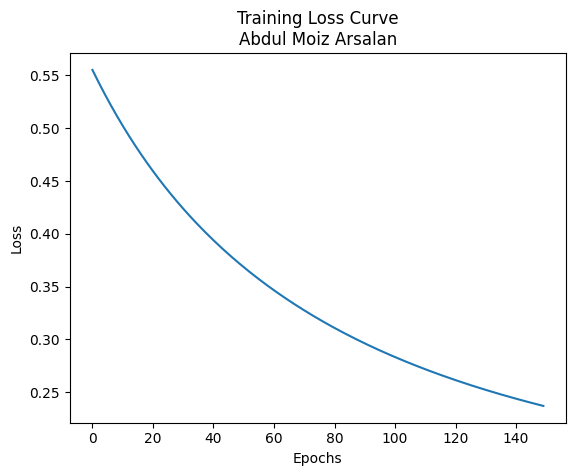

In [81]:
# Plot the training loss curve
plt.plot(nn.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve\nAbdul Moiz Arsalan')
plt.show()